## Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

In [3]:
data = pd.read_csv(r"D:\\harsh\\Blepharospasm\\unseprvised_features.csv")

In [33]:
data.head(5)

,Video Name,Left Eye Avg,Right Eye Avg,label,Avg
0,101,0.592077,0.394258,1,0.493168
1,102,0.563044,0.550908,1,0.556976
2,103,0.131805,0.311870,1,0.221838
3,104,0.351682,0.430613,1,0.391147
4,105,0.404107,0.404867,1,0.404487


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.25, random_state=0)


In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv(r"D:\\harsh\\Blepharospasm\\unseprvised_features.csv")

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.25, random_state=0)

# Extract the feature column from training data
X_train = train_data[['Avg']].values

# Define the number of clusters (2 for binary classification)
n_clusters = 2

# Fit K-means on training data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
train_data['Cluster'] = kmeans.fit_predict(X_train)

# Extract the feature column from test data
X_test = test_data[['Avg']].values

# Define a range of thresholds to test
thresholds = np.linspace(X_test.min(), X_test.max(), num=100)
results = []

def evaluate_threshold(threshold, test_data):
    # Classify based on the threshold
    predictions = (test_data['Avg'] > threshold).astype(int)
    # Compute accuracy
    accuracy = accuracy_score(test_data['label'], predictions)
    return accuracy

for threshold in thresholds:
    accuracy = evaluate_threshold(threshold, test_data)
    results.append((threshold, accuracy))

# Find the best threshold
best_threshold, best_accuracy = max(results, key=lambda x: x[1])
print(f"Best Threshold: {best_threshold}, Best Accuracy: {best_accuracy}")

# Generate predictions using the best threshold
test_data['Predicted'] = (test_data['Avg'] > best_threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(test_data['label'], test_data['Predicted'])
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(test_data['label'], test_data['Predicted'])
print("Classification Report:")
print(class_report)


c:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Best Threshold: 0.4622772885454546, Best Accuracy: 0.9444444444444444
Confusion Matrix:
[[16  0]
 [ 2 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.90      0.95        20

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv(r"D:\\harsh\\Blepharospasm\\unseprvised_features.csv")

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.25, random_state=0)

# Extract the feature columns
X_train = train_data[['Left Eye Avg', 'Right Eye Avg']].values
X_test = test_data[['Left Eye Avg', 'Right Eye Avg']].values

# Define the number of clusters (2 for binary classification)
n_clusters = 2

# Fit K-means on training data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
train_data['Cluster'] = kmeans.fit(X_train)

# Predict clusters on test data
test_data['Cluster'] = kmeans.predict(X_test)

# Define a range of thresholds to test
thresholds = np.linspace(0, 1, num=100)  # Adjust range if necessary
results = []

def evaluate_threshold(threshold, data):
    # Classify based on the threshold
    predictions = (data[['Left Eye Avg', 'Right Eye Avg']].mean(axis=1) > threshold).astype(int)
    # Compute accuracy
    accuracy = accuracy_score(data['label'], predictions)
    return accuracy

for threshold in thresholds:
    accuracy = evaluate_threshold(threshold, test_data)
    results.append((threshold, accuracy))

# Find the best threshold
best_threshold, best_accuracy = max(results, key=lambda x: x[1])
print(f"Best Threshold: {best_threshold}, Best Accuracy: {best_accuracy}")

# Generate predictions using the best threshold
test_data['Predicted'] = (test_data[['Left Eye Avg', 'Right Eye Avg']].mean(axis=1) > best_threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(test_data['label'], test_data['Predicted'])
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(test_data['label'], test_data['Predicted'])
print("Classification Report:")
print(class_report)


c:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Best Threshold: 0.20202020202020204, Best Accuracy: 0.9166666666666666
Confusion Matrix:
[[13  3]
 [ 0 20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.87      1.00      0.93        20

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.91        36
weighted avg       0.93      0.92      0.92        36



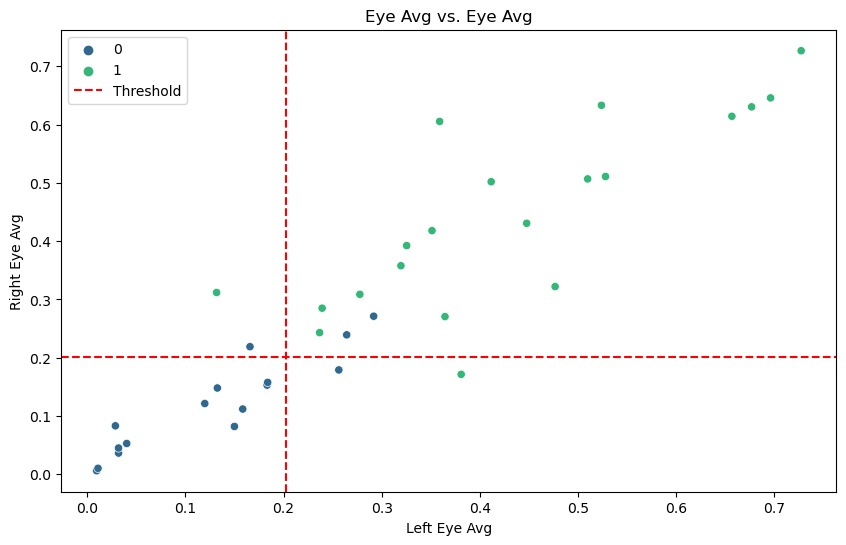

In [69]:
#plot Left Eye Avg and Right Eye Avg and label
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Left Eye Avg', y='Right Eye Avg', hue='label', data=test_data, palette='viridis')

# Highlight the threshold
plt.axvline(best_threshold, color='red', linestyle='--', label='Threshold')
plt.axhline(best_threshold, color='red', linestyle='--')

plt.title('Eye Avg vs. Eye Avg')
plt.legend()
plt.show()

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv(r"D:\\harsh\\Blepharospasm\\unseprvised_features.csv")

# Split into features and labels
X = data[['Left Eye Avg', 'Right Eye Avg']]
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Function to apply threshold and form clusters
def apply_threshold(X, threshold):
    # Use the mean of 'Left Eye Avg' and 'Right Eye Avg' as a simple example
    mean_feature = X.mean(axis=1)
    return (mean_feature >= threshold).astype(int)

# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    # Calculate the clustering accuracy
    correct_labels = (y_true == y_pred)
    accuracy = correct_labels.mean()
    return accuracy

# Define range for threshold
thresholds = np.linspace(0, 1, 101)
best_accuracy = 0
best_threshold = 0

# Use the mean of 'Left Eye Avg' and 'Right Eye Avg' for clustering
mean_feature_train = X_train[['Left Eye Avg', 'Right Eye Avg']].mean(axis=1)

for threshold in thresholds:
    # Apply threshold to training data
    train_clusters = apply_threshold(X_train[['Left Eye Avg', 'Right Eye Avg']], threshold)
    
    # Calculate accuracy on training data
    accuracy = calculate_accuracy(y_train, train_clusters)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f'Best Threshold: {best_threshold}, Training Accuracy: {best_accuracy}')

# Apply the optimal threshold to the test data
mean_feature_test = X_test[['Left Eye Avg', 'Right Eye Avg']].mean(axis=1)
test_clusters = apply_threshold(X_test[['Left Eye Avg', 'Right Eye Avg']], best_threshold)

# Calculate accuracy and confusion matrix on test data
test_accuracy = accuracy_score(y_test, test_clusters)
conf_matrix = confusion_matrix(y_test, test_clusters)

print(f'Test Accuracy: {test_accuracy}')
print('Confusion Matrix:')
print(conf_matrix)


Best Threshold: 0.22, Training Accuracy: 0.9444444444444444
Test Accuracy: 0.8611111111111112
Confusion Matrix:
[[13  3]
 [ 2 18]]
